# Predicting Survival on Titanic using Machine Learning 

As a newcomer to Kaggle, this is my first competition on Kaggle. I have acquired knowledge and skills in data science and machine learning from MOOCs and have picked this challenge to gain more experience on working with real datasets.

We are going to take the following approach for our problem:
1. Problem Definition
2. Data
3. Features  
4. Exploratory Data Analysis (EDA)
5. Preprocessing of data
4. Modelling and tuning of models
5. Predicting on our test dataset




## 1. Problem Definition 

>Given passenger data, are we able to predict whether or not they have survived the Titanic crash?

## 2. Data


This is a competition that is hosted by Kaggle.

The data that we are using comes from the Kaggle Website below:
https://www.kaggle.com/c/titanic?rvi=1   
    

## 3. Features
The following are the features which we will use to predict our target variable(whether one survived the Titanic crash)


1. survival:	Survival	(0 = No, 1 = Yes)
2. pclass:	Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
3. sex:	Sex	
4. Age:	Age in years	
5. sibsp: Number of siblings / spouses aboard the Titanic	
6. parch:Number of parents / children aboard the Titanic	
7. ticket:Ticket number	
8. fare:Passenger fare	
9. cabin:Cabin number	
10. embarked:Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

Variable Notes  
* pclass: A proxy for socio-economic status (SES)
(1st = Upper
2nd = Middle
3rd = Lower)


* Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


* sibsp: The dataset defines family relations in this way...
   * Sibling = brother, sister, stepbrother, stepsister
   * Spouse = husband, wife (mistresses and fiancés were ignored)


* parch: The dataset defines family relations in this way...
 * Parent = mother, father
 * Child = daughter, son, stepdaughter, stepson
 * Some children travelled only with a nanny, therefore parch=0 for them.

## 4. Exploratory Data Analysis (EDA)

In our EDA section, we will analyse the different features of our dataset and address the following questions.

1. What question are we trying to solve?
2. What kind of data do we have and how do we treat different type of data?
3. Are there any missing data? How do we deal with them?
4. Are there any outliers? How do we deal with them?
5. Are there any duplicates? How do we deal with them?
6. Explore some correlation that may exist between our features and our target variable






### Preparing the tools we need
We will begin off with importing our tools for data analysis and manipulation from the various libraries.

In [1]:
#Importing the tools we need for our data analysis and visualization

#For exploratory data analysis and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For our plots to appear inside the notebook
%matplotlib inline


### 4.1 What question are you trying to solve?

Here, we are trying to predict whether someone has survived the Titanic Crash based on their demographics and passenger information.
Our target variable is the Survived column and the rest of the columns are our features. 

In [2]:
# load date into pandas dataframe
titanic_df=pd.read_csv('train.csv')

#View the top 5 rows of our data
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Get overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Lets's view how many values we have in our target column 'Survived' (0=Did not survived,1=Survive)
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
#To view value count in percentages
titanic_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

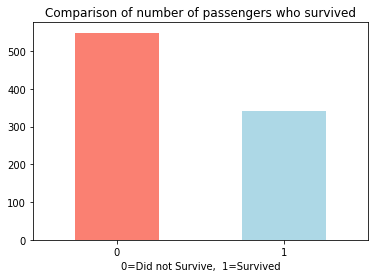

In [6]:
#let's visualize the value count for the Survived column via a barchart
titanic_df['Survived'].value_counts().plot(kind='bar',
                                  color=['salmon','lightblue'])

plt.title('Comparison of number of passengers who survived')
plt.xticks(rotation=0); # keep the labels on the x-axis vertical
plt.xlabel('0=Did not Survive,  1=Survived');


### 4.2 What kind of data do we have and how do we treat different types of data?

In [7]:
#Let's check the data types for our data
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We have a combination of numerical (int,float) and non-numeric (object) data types.

In [8]:
#Let's view the number of unique values for each features. Here, we can see which features are categoical vs non-categorical
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

We can deduce that Pclass, Sibsp, Parch and Embarked are categorical features while the rest are not.

### 4.3 Are there any missing data? How do we deal with them?

In [9]:
#Lets check if there is any missing values in our data and find how many missing values there are for each column
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Lets see the percentage of missing values for all columns
round(titanic_df.isna().sum()/len(titanic_df)*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

There are missing values in our Age, Cabin and Embarked columns. Let's see the distribution of these missing values. We have a few methods to do so.

1. Seaborn Heatmap
2. Missing no module

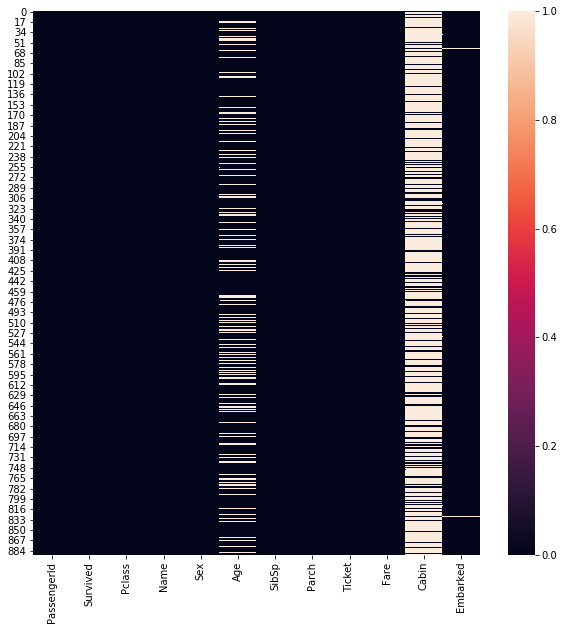

In [11]:
#Method 1: Seaborn Heatmap
plt.figure(figsize=(10,10)) #set the size of the figure
sns.heatmap(titanic_df.isna());

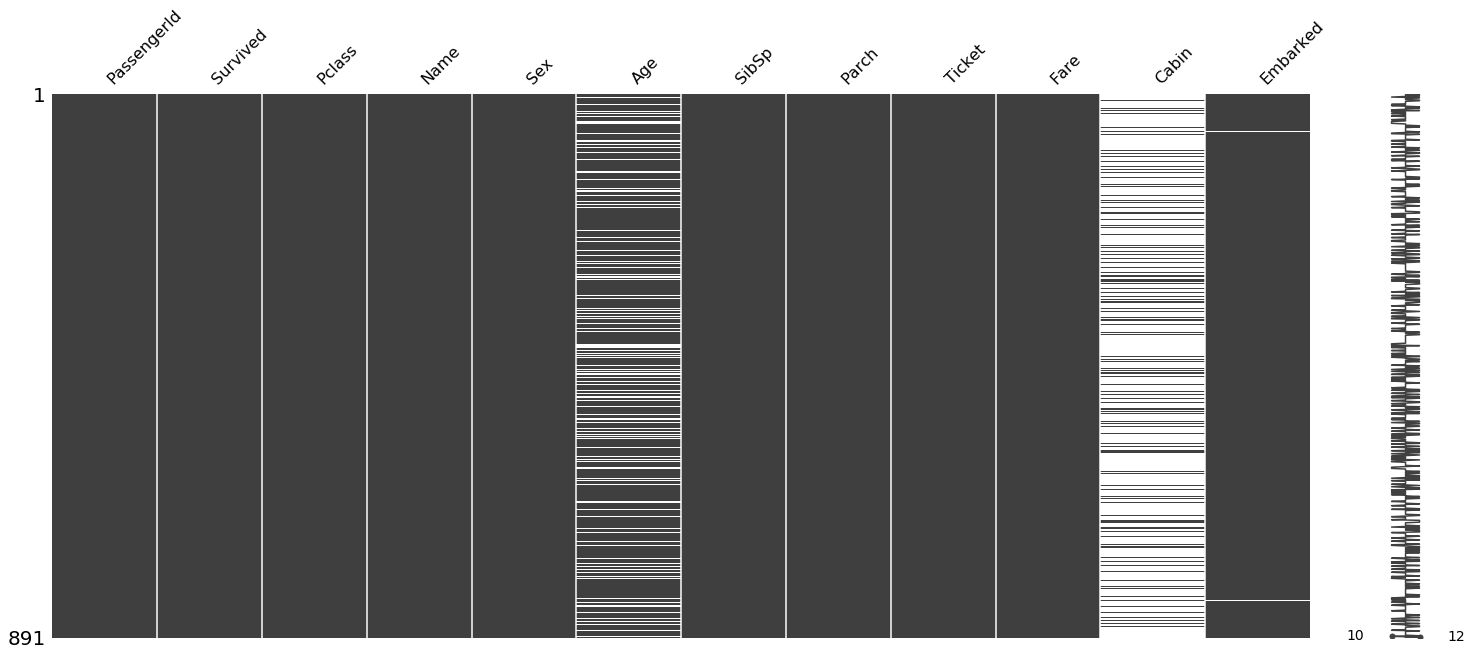

In [12]:
#Method 2: Missingno module

# We'll import the missingno module first into our Jupyter notebook 
# pip install missingno

import missingno as msno

msno.matrix(titanic_df);

**Conclusion**: 

There is a large number of missing values in Cabin (77%),a smaller number of missing values in Age(19%) and in embarked (0.22%).

Training a model with missing data will give us an error. We will fill/impute the missing values in these columns during our data preprocessing stage.

### 4.4 Are there any outliers? How should we deal with them?

Outliers are extreme values that are outside the range of what is expected and unlike the other data. Machine learning modeling and model skill in general can be improved by understanding why they are there and even removing these outlier values.

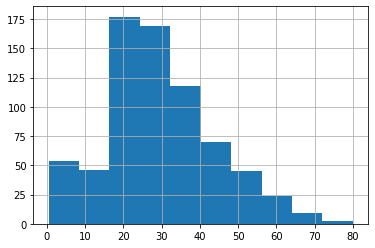

In [13]:
#Let's check if there's any outliers in our data
#We'll start off with the age column

titanic_df.Age.hist();


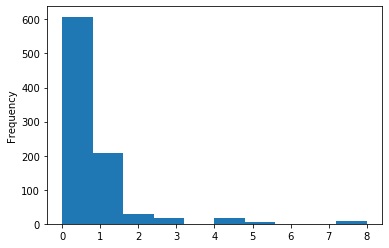

In [14]:
#Checking for outliers in the sibsp columm
titanic_df['SibSp'].plot.hist();

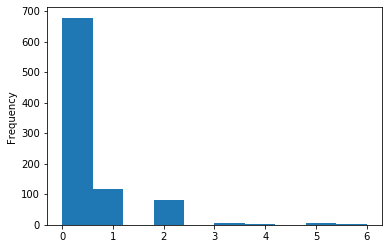

In [15]:
#Checking for outliers in the Parch columm
titanic_df['Parch'].plot.hist();

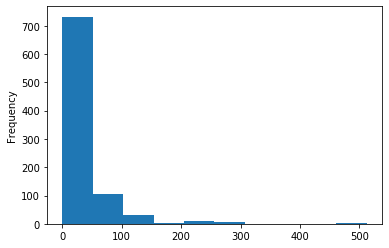

In [16]:
#Checking for outliers in the fare columm
titanic_df['Fare'].plot.hist();

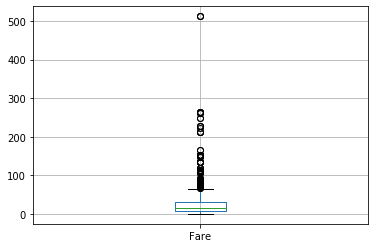

In [17]:
#The fare is distributed with the majority with $0-100. 
titanic_df.boxplot(column=['Fare']);

In [18]:
#The Fare has a few with extreme values of above 500, lets view the rows
titanic_df[titanic_df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Conclusion: From the above table, we can see that although the Fare price of these passengers is very high,these outliers does not seem to be put up by mistake. Therefore we leave them as it is.
    

### 4.5 Are there any duplicates? How should we deal with them?

In [19]:
#Check for duplicates in passengerid and name column
titanic_df.duplicated(subset=['PassengerId','Name'], keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

Conclusion: There are no duplicates in our dataset.

###  4.6 Explore some correlation that may exist between our features and our target variable

In this section, we aim to do some analysis on the relationship between our independent variables and our dependent(target) variable.


In [20]:
#let's compare our target column with the pclass column
pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


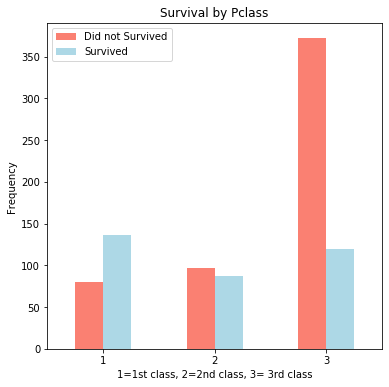

In [21]:
#Let's visualize the relationship between 'Survived' and 'Pclass'

pd.crosstab(titanic_df['Pclass'],titanic_df['Survived']).plot(kind='bar',
                                             color=['salmon','lightblue'],
                                             figsize=(6,6))

plt.title('Survival by Pclass')
plt.xlabel('1=1st class, 2=2nd class, 3= 3rd class')
plt.ylabel('Frequency')
plt.legend(['Did not Survived','Survived'])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

Conclusion: The survival rate for the passengers in first class is higher than than of those in the second and third class.

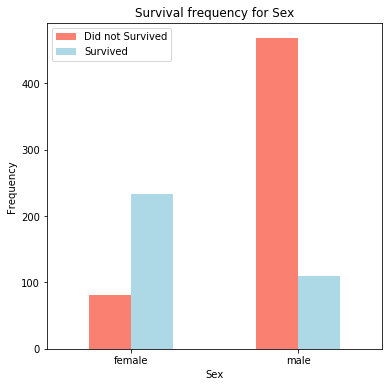

In [22]:
#Let's visualize the relationship between 'Survived' and 'Sex'

pd.crosstab(titanic_df['Sex'],titanic_df['Survived']).plot(kind='bar',
                                             color=['salmon','lightblue'],
                                             figsize=(6,6))

plt.title('Survival frequency for Sex')
plt.ylabel('Frequency')
plt.legend(['Did not Survived','Survived'])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

Conclusion: The above graph shows that the proportion of female who survived is significantly higher than the male who survived. It seems that all else equal, females are more likely to survive as compared to a male.

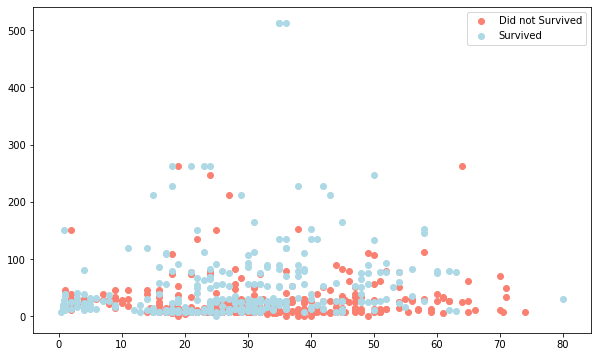

In [23]:
#Let's compare age with fare using a scatterplot

plt.figure(figsize=(10,6))

#Survived=0
plt.scatter(titanic_df['Age'][titanic_df.Survived==0],
           titanic_df['Fare'][titanic_df.Survived==0],
           c='salmon')

#Survived=1
plt.scatter(titanic_df['Age'][titanic_df.Survived==1],
           titanic_df['Fare'][titanic_df.Survived==1],
           c='lightblue')

plt.legend(['Did not Survived','Survived']);

Conclusion: While it is shown that those who paid above 500 survived, there is no clear relationship between age and fare for survival rate.

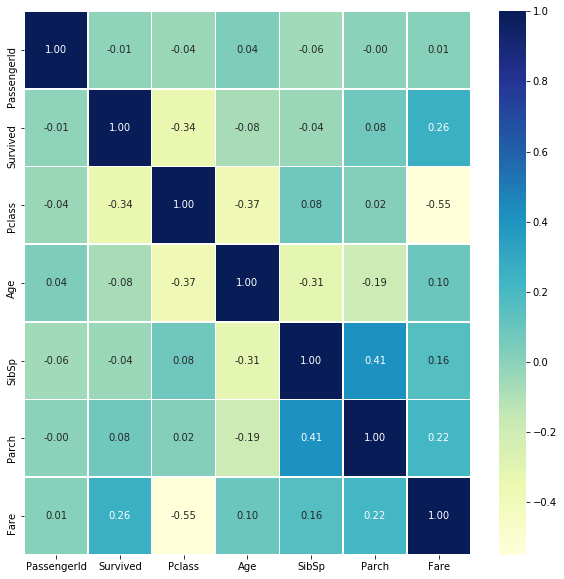

In [24]:
#We use'll a correlation matrix to see how our variable relates to each other

corr_matrix=titanic_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=0.5,
           fmt='.2f',
           cmap='YlGnBu');




A higher positive value means a potential positive correlation and a higher negative value means a potential negative correlation.

From the correlation matrix above, we can infer the following
* Pclass has a negative correlation with Survived. The lower the class(eg, 1), the higher the probability of the person surviving

* Fare has a positive correlation with Survived. The higher the fare, the higher the probability of the person surviving

This is in line with the reasoning that priority to the lifeboats(and hence survival) may be given to those who have paid a higher fare/from a higher class.



## 5. Preprocessing of data

Now that we have gained a better understanding of our data and its features, we move on to our next step- to process our data before we can use them to train our models. In this section, we will be performing the following steps.

1. Splitting our data into training and validation set first using train test split before any imputation/transformation of data is performed.
2. Impute missing values
3. Convert non-numerical data into numbers

### 5.1  Splitting our data into train test split first before any imputation/transformation of data


To train a machine learning model, data has to be split into training set, validation set. We'll train a model using the train set, evaluate and experiment on the model using our validation set and test our model on the test set. 


Before we perform any imputation/transformation, we need to split our data into training set and validation set first. This is to ensure that there will be no data leakage.

In [25]:
#Spliting our data into the features variables and the target variable 

#Create X (all the feature columns)
X= titanic_df.drop(['Survived'],axis=1)#Dropping the survived column only

#Create y (the target column)
y=titanic_df['Survived'] #Taking the Survived column only


In [26]:
#View first 5 rows for our X
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
#View first 5 rows for our y
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
#View the shape of our X and y
X.shape,y.shape

((891, 11), (891,))

In [29]:
#Split the data into training and validation set

from sklearn.model_selection import train_test_split

X_train,X_val, y_train,y_val=train_test_split(X,
                                              y,
                                             test_size=0.2,
                                             random_state=42)


In [30]:
#View the shapes of training and validation set
X_train.shape,X_val.shape, y_train.shape,y_val.shape

((712, 11), (179, 11), (712,), (179,))

### 5.2. Impute missing values

We'll perform imputation/transformation on our training dataset and validation dataset separately. We'll start off with training set first then apply the same imputation/transformation to our validation dataset. 

We will take the following steps below
1. Impute the cabin column missing values with 'NA' 

2. There is only 2 missing values in Embarked(<1%). Embarked is a categorical type of data. We will impute the missing values with the mode(highest frequency)

3. Impute the missing values in our Age column with median


### 5.2.1 Impute missing values in the cabin column with 'NA'

In [31]:
#Impute the missing values in Cabin with 'NA'
X_train['Cabin'].fillna('NA',inplace=True)


C:\Users\Sharon\Desktop\titanic_project\env\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [32]:
#Check number of missing data in Cabin column
X_train['Cabin'].isna().sum()

0

### 5.2.2 Impute the missing value in Embarked with the mode(highest frequency)

In [33]:
#Find the category with the highest frequency
X_train['Embarked'].mode()[0]

'S'

In [34]:
#Impute the missing values in the Embarked column with the mode

X_train['Embarked'].fillna(X_train['Embarked'].mode()[0],inplace=True)


In [35]:
#Check number of missing data in Embarked column
X_train['Embarked'].isna().sum()

0

### 5.2.3 Impute missing values in age with the median age


In [36]:
#Impute the missing values in the Age column with median (Median is more robust than mean, less sensitive to outliers)

X_train['Age'].fillna(X_train['Age'].median(),inplace=True)

In [37]:
#Check number of missing data in Age column
X_train['Age'].isna().sum()

0

### Now that imputation are all done, check that there are no more missing values


In [38]:
#Check that there are no more missing values in our training set
X_train.isna().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

We have checked that there are no more missing values in our training dataset(ie X_train)

Now that we have imputed our X_train dataset, we do the same to our validation dataset: X_val

### Repeating all the imputation steps for our X_val dataset

In [39]:
#Fill missing values in cabin with 'NA'
X_val['Cabin'].fillna('NA',inplace=True)


#Impute the missing values in the Embarked column with the mode
X_val['Embarked'].fillna(X_train['Embarked'].mode()[0],inplace=True)

#Impute the missing values in the Age column with median (Median is more robust than mean, less sensitive to outliers)
X_val['Age'].fillna(X_train['Age'].median(),inplace=True)







In [40]:
X_val.shape

(179, 11)

In [41]:
#Check that there are no more missing values in X_val
X_val.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 5.3 Converting non-numerical data into numbers for both training and validation set

We will convert our non-numerical data(Name,Sex,Ticket,Cabin and Embarked) into numbers using the Scikit-Learn One Hot Encoder

In [42]:
#Let's view our data types again

X_train.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Name, Sex, Ticket , Cabin and Embarked are of object/non-numerical types, We will perform one hot encoding to convert them into numerical data

In [43]:
#Let's convert the non-numerical column to one hot encoded -Transform training and validation set separately

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

non_numerical_features=['Name','Sex','Ticket','Cabin','Embarked']
one_hot=OneHotEncoder(sparse=False,handle_unknown='ignore') #sparse=False to return a numpy array, handle unknown='ignore' to ignore any unknown categorical data(eg, category which may be present in train set but not in valid set)
transformer=ColumnTransformer([('one_hot',
                               one_hot,
                               non_numerical_features)],
                              remainder='passthrough')

transformed_X_train=transformer.fit_transform(X_train)

#Transform our X_val data
transformed_X_val=transformer.transform(X_val)


In [44]:
#Check the shape of our transformed X_train and X_val
transformed_X_train.shape,transformed_X_val.shape

((712, 1399), (179, 1399))

We have successfully imputed all missing values and converted non-numerical data to numerical data .
Now that both our training and data set has been processed, we can move on to modelling

## 6. Modelling

We are dealing with a binary classification problem and the following algorithm will be used to train our models.

* Linear SVC
* K Nearest Neighbours
* Logistics Regression
* Random Forest Classifier
* DecisionTreeClassifier
* AdaBoostClassifier
* GradientBoostingClassifier
* Naive Bayes 
* XG Boost

In [45]:
#import all the models from sklearn

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
from xgboost import XGBClassifier

#Import cross-validation score module
from sklearn.model_selection import cross_val_score


Let's make a function to fit all our models and evaluate them in one code











In [46]:
#Put models in a dictionary


models={'Linear SVC':LinearSVC(),
       'KNN': KNeighborsClassifier(),
       'Logistics Regression':LogisticRegression(),
        'Random Forest':RandomForestClassifier(),
        'Decision Tree':DecisionTreeClassifier(),
        'Adaboost':AdaBoostClassifier(),
       'Gradient Boost':GradientBoostingClassifier(),
       'Naive Bayes':GaussianNB(),
       'XGBoost':XGBClassifier()}



#Create function to fit and score models

def fit_and_score(models, X_train,X_val,y_train,y_val):
    '''
    
    Fits and evaluate given machine learning models
    
    models: a dict of different Sklearn machine learning models
    
    X_train :training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    
    '''
    #Set random seed 
    np.random.seed(42)
    
    #Make a empty dict to keep model scores
    models_scores={}
    
    #Loop through key, value in models
    for name,model in models.items():
        
        #Fit the model to the training data
        model.fit(X_train,y_train)
        
        #Evaluate the model and append its 5 fold cross-val scores to models_scores
        #you are creating the key and value pair in model_scores
        
        models_scores[name]=np.mean(cross_val_score(model,X_val,y_val,cv=5))
        
    return models_scores


In [47]:
model_scored=fit_and_score(models=models,
                           X_train=transformed_X_train,
                           X_val=transformed_X_val,
                           y_train=y_train,
                           y_val=y_val)

C:\Users\Sharon\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Sharon\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Sharon\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Sharon\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Sharon\Desktop\titanic_project\env\lib\site-packages\sklearn\svm\_b

In [48]:
model_scored

{'Linear SVC': 0.682063492063492,
 'KNN': 0.6533333333333333,
 'Logistics Regression': 0.8157142857142856,
 'Random Forest': 0.7657142857142858,
 'Decision Tree': 0.738095238095238,
 'Adaboost': 0.7095238095238094,
 'Gradient Boost': 0.7098412698412698,
 'Naive Bayes': 0.5811111111111111,
 'XGBoost': 0.7431746031746032}

### Model Comparison

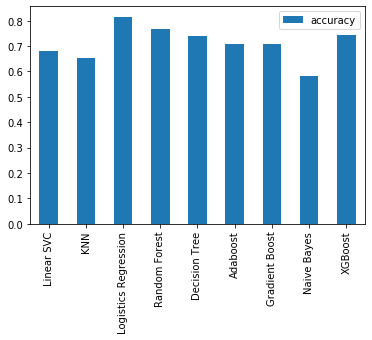

In [49]:
#Visualize our model scores
model_compare=pd.DataFrame(model_scored,index=['accuracy'])
model_compare.T.plot.bar();

Looking at the above, Logistics Regression Model fared the best with an accuracy of 0.81. Let's try to tune it to improve our model score.

### 6.1 Hyperparameter Tuning

* Randomized Search CV
* Grid Search CV


 ### 6.1.1 Hyperparamter Tuning Using RandomizedSearchCV

In [50]:
#Let's see the default parameters used for our logistics regression model

lr_model = LogisticRegression()

lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [51]:

#Tuning our model using Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"],
               "penalty": ['l1', 'l2']}

lr_rs_model=RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_reg_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

lr_rs_model.fit(transformed_X_train,y_train)

print("Best score: {}".format(lr_rs_model.best_score_))
print("Optimal params: {}".format(lr_rs_model.best_estimator_))
print('Optimal params:{}'.format(lr_rs_model.best_params_))





Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8188121737417513
Optimal params: LogisticRegression(C=545.5594781168514, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Optimal params:{'solver': 'liblinear', 'penalty': 'l2', 'C': 545.5594781168514}


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


Through RandomizedSearchCV, we managed to improve our model score from 0.816 to 0.819. Let's now use GridSearchCV to find the best model

 ### 6.1.2 Hyperparamter Tuning Using GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"],
               'penalty': ['l1', 'l2']}


lr_gs_model=GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5,
                           verbose=True,
                        n_jobs=-1)

lr_gs_model.fit(transformed_X_train,y_train)

print("Best score: {}".format(lr_gs_model.best_score_))
print("Optimal params: {}".format(lr_gs_model.best_estimator_))
print('Optimal params:{}'.format(lr_gs_model.best_params_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.6s


Best score: 0.8188121737417513
Optimal params: LogisticRegression(C=78.47599703514607, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Optimal params:{'C': 78.47599703514607, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.0s finished


Now, our best score for our logistics regression is 0.819.



### 7. Predicting on our test dataset

In order to use our model to predict on our test dataset, it has to be transformed in the same way as our training dataset



In [53]:
#Import our test data into pandas dataframe
test_df=pd.read_csv('test.csv')

In [54]:
#View first 5 rows of our test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
#A summary of test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [56]:
#Let's check the missing values in our test
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are missing values in Age, Cabin and Fare columns. We'll perform the same imputation that we have performed on our training set to our test dataset.

Note here that we will use the training dataset to compute the median. This ensures that there is no data leakage for our test dataset.

In [57]:
#Fill missing values in cabin with 'NA'
test_df['Cabin'].fillna('NA',inplace=True)

#Impute the missing values in the Age column with median. (Median is more robust than mean, less sensitive to outliers)
test_df['Age'].fillna(X_train['Age'].median(),inplace=True)

#Replace Fare with the median value of our train dataset (Median is more robust than mean, less sensitive to outliers)
test_df['Fare'].fillna(X_train['Fare'].median(),inplace=True)



In [58]:
#Let's check that there are no more missing values in our test dataset
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [59]:
#Convert our test dataset into numerical using the same transformer(one hot encoder) we used for our training set

transformed_test_df=transformer.transform(test_df)


In [60]:
#Check the shape of our transformed test dataset
transformed_test_df.shape

(418, 1399)

In [61]:
#Instantiate our Logistics Regression model, fit and train our model on training set
best_lr_model=lr_gs_model.best_estimator_


best_lr_model.fit(transformed_X_train,y_train)


LogisticRegression(C=78.47599703514607, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
#Make predictions on our test dataset
y_preds=best_lr_model.predict(transformed_test_df)

In [63]:
#View our predictions
y_preds,y_preds.shape

(array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 

In [64]:
#let's turn our predictions into a dataframe

#Create a dataframe with the 2 columns(PassengerId and Survived) required
predictions_df=pd.DataFrame(columns=['PassengerId','Survived'])


#Add our passengerId to the PassengerId column
predictions_df['PassengerId']=test_df['PassengerId']

#Add our predictions(y_preds) to the Survived column
predictions_df['Survived']=y_preds

In [65]:
#Let's view our predictions dataframe
predictions_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [66]:
#Let's convert our dataframe into a csv file for submission to kaggle
predictions_df.to_csv('predictions-logregmodel2.csv',index=False)

## Conclusion

This submission scores 0.76 on the public leaderboard, landing me in the top 21% of all submissions. It is not the highest but it's not bad for a newcomer.

Thank you for reading and feel free to comment and give suggestions.